## Forecast evaluation

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import xskillscore as xs
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset("/glade/work/molina/studies/test_best/echo_stuff/trial/inference_data.nc")

In [3]:
ds

<xarray.Dataset>
Dimensions:     (samples: 157, channel: 4, x: 360, y: 181)
Coordinates:
  * x           (x) float32 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * y           (y) float32 -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
Dimensions without coordinates: samples, channel
Data variables:
    cesm_input  (samples, channel, x, y) float32 ...
    era5_label  (samples, x, y) float32 ...
    ml_predict  (samples, x, y) float32 ...
    land_masks  (samples, x, y) float32 ...

### Evaluate all grid cells

Visualizing one prediction

In [4]:
sample_ = 100

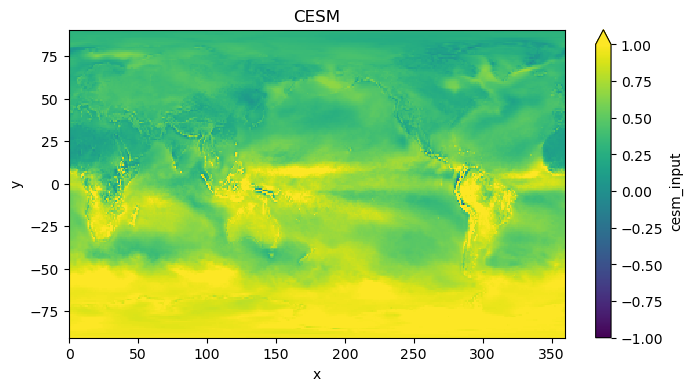

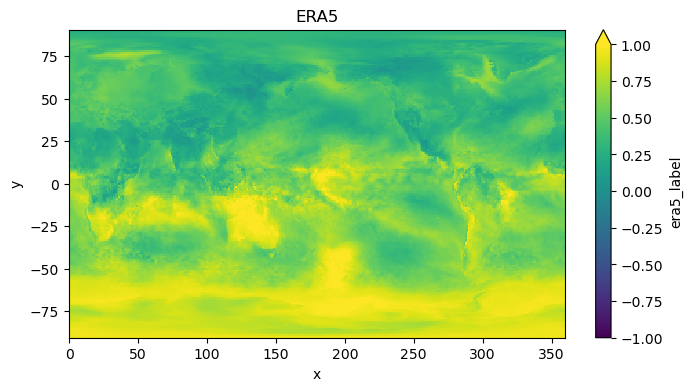

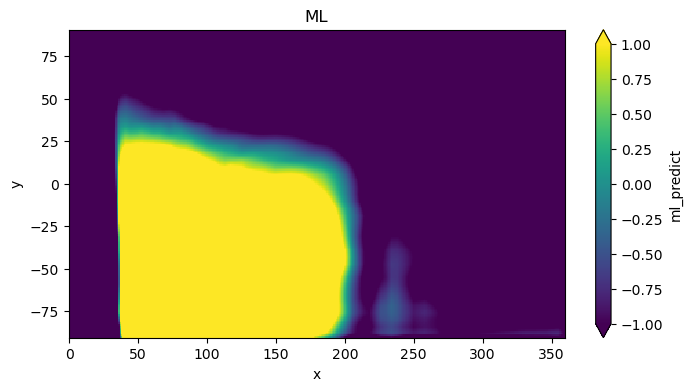

In [5]:
ds['cesm_input'].isel(samples=sample_,channel=3).plot.pcolormesh(
    'x','y',vmin=-1,vmax=1,figsize=(8,4)); plt.title('CESM'); plt.show()
ds['era5_label'].isel(samples=sample_).plot.pcolormesh(
    'x','y',vmin=-1,vmax=1,figsize=(8,4)); plt.title('ERA5'); plt.show()
ds['ml_predict'].isel(samples=sample_).plot.pcolormesh(
    'x','y',vmin=-1,vmax=1,figsize=(8,4)); plt.title('ML'); plt.show()

### Pearson correlation

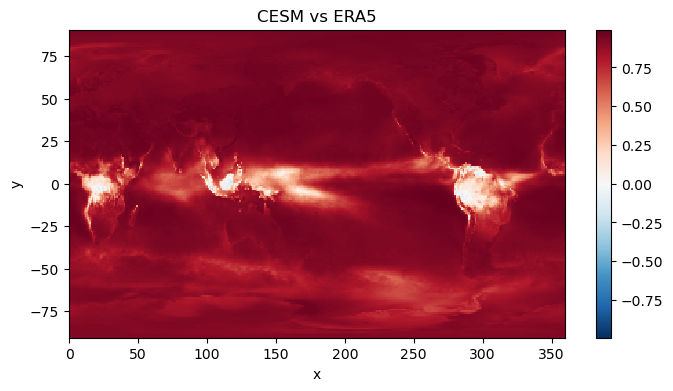

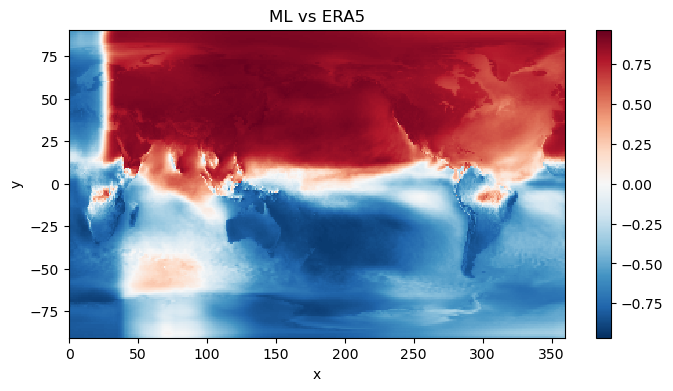

In [6]:
xs.pearson_r(ds['cesm_input'].isel(channel=3), 
             ds['era5_label'], 
             dim='samples').plot.pcolormesh(
    'x','y',figsize=(8,4)); plt.title('CESM vs ERA5'); plt.show()
xs.pearson_r(ds['ml_predict'], 
             ds['era5_label'], 
             dim='samples').plot.pcolormesh(
    'x','y',figsize=(8,4)); plt.title('ML vs ERA5'); plt.show()

In [7]:
print('CESM vs ERA5:',
    xs.pearson_r(
        ds['cesm_input'].isel(channel=3), 
        ds['era5_label'], 
        dim=['samples','x','y']).values
)
print('ML vs ERA5:',
    xs.pearson_r(
        ds['ml_predict'], 
        ds['era5_label'], 
        dim=['samples','x','y']).values
)

CESM vs ERA5: 0.8500175476074219
ML vs ERA5: 0.022392181679606438


### Mean absolute error

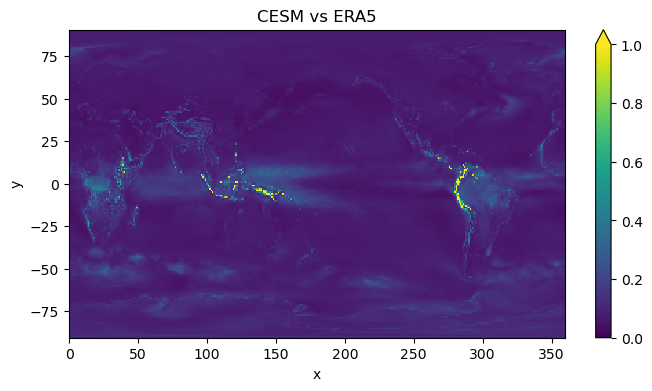

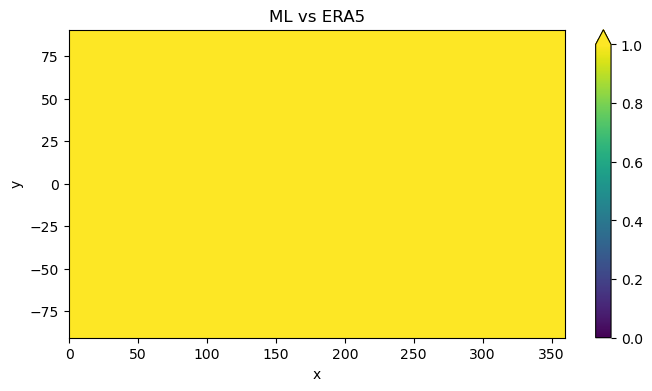

In [8]:
xs.mae(
    ds['cesm_input'].isel(channel=3), 
    ds['era5_label'], dim='samples').plot.pcolormesh(
    'x','y',vmin=0,vmax=1,figsize=(8,4)); plt.title('CESM vs ERA5'); plt.show()
xs.mae(
    ds['ml_predict'], 
    ds['era5_label'], dim='samples').plot.pcolormesh(
    'x','y',vmin=0,vmax=1,figsize=(8,4)); plt.title('ML vs ERA5'); plt.show()

In [9]:
print('CESM vs ERA5:',
    xs.mae(
        ds['cesm_input'].isel(channel=3), 
        ds['era5_label'], 
        dim=['samples','x','y']).values
)
print('ML vs ERA5:',
    xs.mae(
        ds['ml_predict'], 
        ds['era5_label'], 
        dim=['samples','x','y']).values
)

CESM vs ERA5: 0.095418684
ML vs ERA5: 6.024261


### RMSE

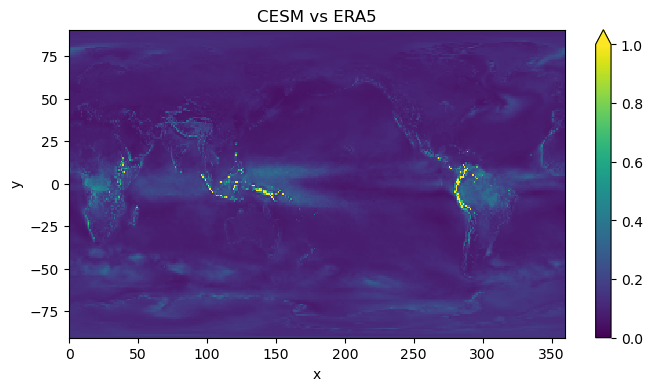

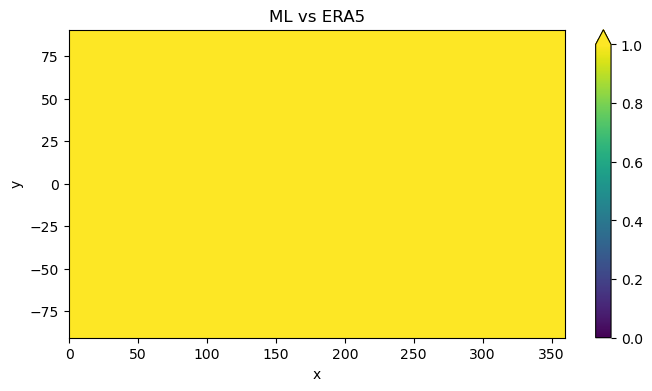

In [10]:
xs.rmse(
    ds['cesm_input'].isel(channel=3), 
    ds['era5_label'], dim='samples').plot.pcolormesh(
    'x','y',vmin=0,vmax=1,figsize=(8,4)); plt.title('CESM vs ERA5'); plt.show()
xs.rmse(
    ds['ml_predict'], 
    ds['era5_label'], dim='samples').plot.pcolormesh(
    'x','y',vmin=0,vmax=1,figsize=(8,4)); plt.title('ML vs ERA5'); plt.show()

In [11]:
print('CESM vs ERA5:',
    xs.rmse(
        ds['cesm_input'].isel(channel=3), 
        ds['era5_label'], 
        dim=['samples','x','y']).values
)
print('ML vs ERA5:',
    xs.rmse(
        ds['ml_predict'], 
        ds['era5_label'], 
        dim=['samples','x','y']).values
)

CESM vs ERA5: 0.13811587
ML vs ERA5: 8.95246


### Evaluate land only

Visualizing one prediction

In [12]:
sample_ = 100

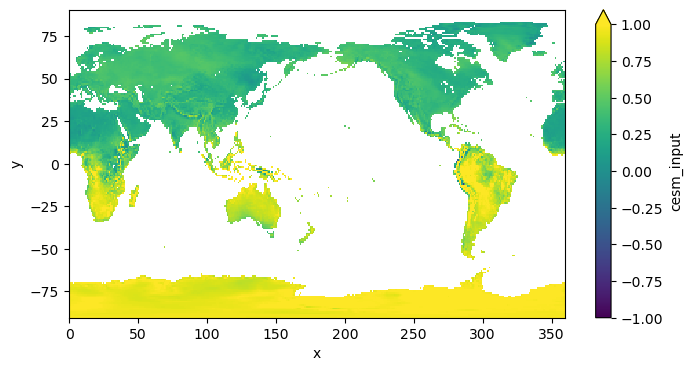

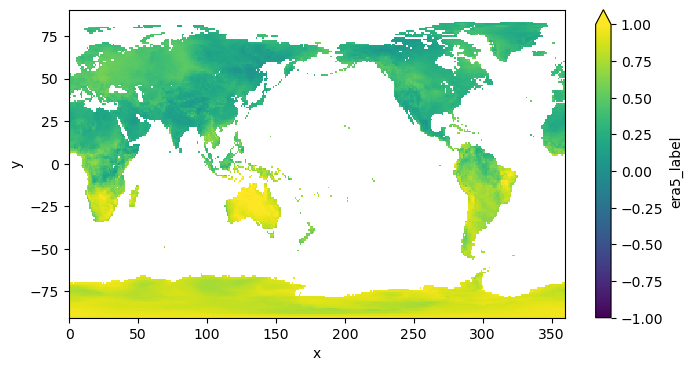

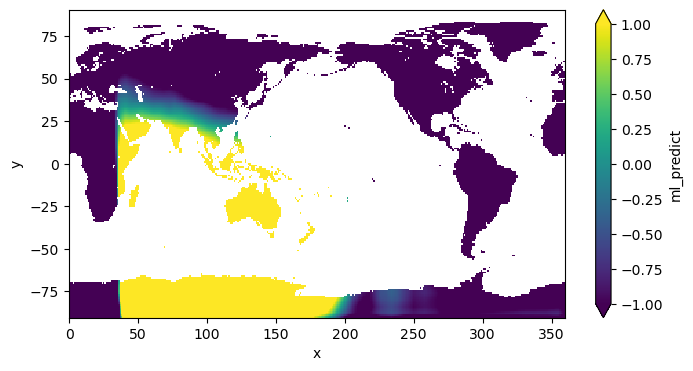

In [13]:
ds['cesm_input'].where(ds['land_masks']==1,np.nan).isel(
    samples=sample_,channel=3).plot.pcolormesh('x','y',vmin=-1,vmax=1,figsize=(8,4)); plt.show()
ds['era5_label'].where(ds['land_masks']==1,np.nan).isel(
    samples=sample_).plot.pcolormesh('x','y',vmin=-1,vmax=1,figsize=(8,4)); plt.show()
ds['ml_predict'].where(ds['land_masks']==1,np.nan).isel(
    samples=sample_).plot.pcolormesh('x','y',vmin=-1,vmax=1,figsize=(8,4)); plt.show()

### Pearson correlation

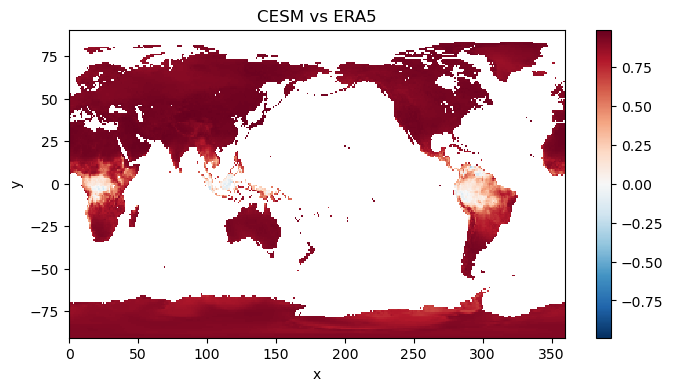

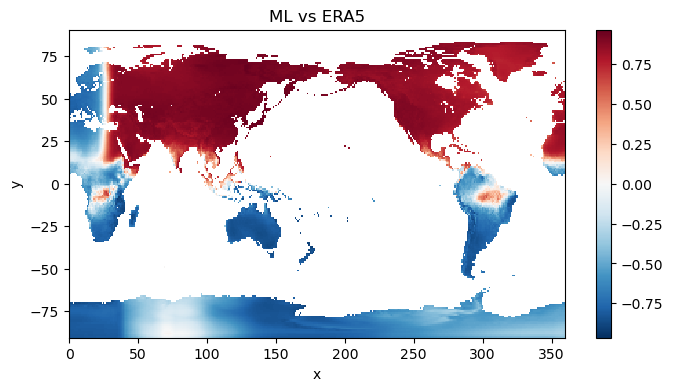

In [14]:
xs.pearson_r(
    ds['cesm_input'].where(ds['land_masks']==1,np.nan).isel(channel=3), 
    ds['era5_label'].where(ds['land_masks']==1,np.nan), dim='samples').plot.pcolormesh(
    'x','y',figsize=(8,4)); plt.title('CESM vs ERA5'); plt.show()
xs.pearson_r(
    ds['ml_predict'].where(ds['land_masks']==1,np.nan), 
    ds['era5_label'].where(ds['land_masks']==1,np.nan), dim='samples').plot.pcolormesh(
    'x','y',figsize=(8,4)); plt.title('ML vs ERA5'); plt.show()

In [15]:
print('CESM vs ERA5:',
    xs.pearson_r(
        ds['cesm_input'].where(ds['land_masks']==1,np.nan).isel(channel=3), 
        ds['era5_label'].where(ds['land_masks']==1,np.nan), 
        dim=['samples','x','y'], skipna=True).values
)
print('ML vs ERA5:',
    xs.pearson_r(
        ds['ml_predict'].where(ds['land_masks']==1,np.nan), 
        ds['era5_label'].where(ds['land_masks']==1,np.nan), 
        dim=['samples','x','y'], skipna=True).values
)

CESM vs ERA5: 0.8106372952461243
ML vs ERA5: 0.07435519993305206


### MAE

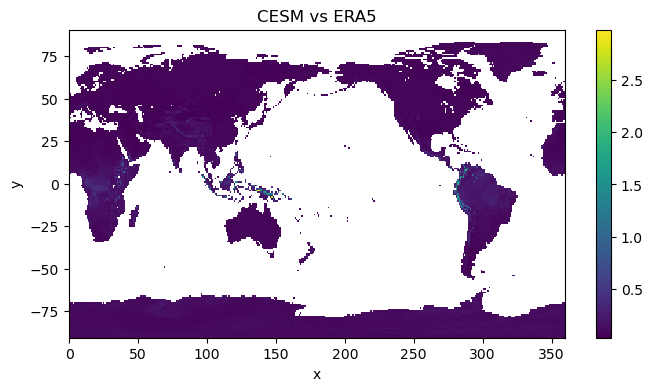

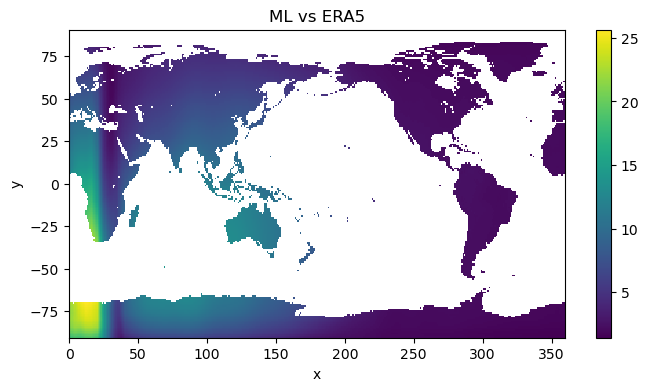

In [16]:
xs.mae(
    ds['cesm_input'].where(ds['land_masks']==1,np.nan).isel(channel=3), 
    ds['era5_label'].where(ds['land_masks']==1,np.nan), dim='samples').plot.pcolormesh(
    'x','y',figsize=(8,4)); plt.title('CESM vs ERA5'); plt.show()
xs.mae(
    ds['ml_predict'].where(ds['land_masks']==1,np.nan), 
    ds['era5_label'].where(ds['land_masks']==1,np.nan), dim='samples').plot.pcolormesh(
    'x','y',figsize=(8,4)); plt.title('ML vs ERA5'); plt.show()

In [17]:
print('CESM vs ERA5:',
    xs.mae(
        ds['cesm_input'].where(ds['land_masks']==1,np.nan).isel(channel=3), 
        ds['era5_label'].where(ds['land_masks']==1,np.nan), 
        dim=['samples','x','y'], skipna=True).values
)
print('ML vs ERA5:',
    xs.mae(
        ds['ml_predict'].where(ds['land_masks']==1,np.nan), 
        ds['era5_label'].where(ds['land_masks']==1,np.nan), 
        dim=['samples','x','y'], skipna=True).values
)

CESM vs ERA5: 0.10717031
ML vs ERA5: 5.839722


### RMSE

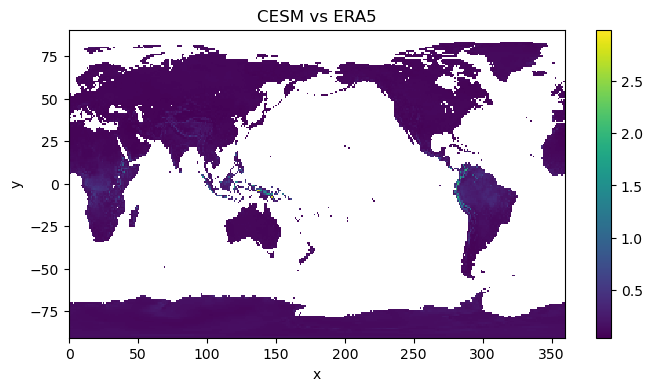

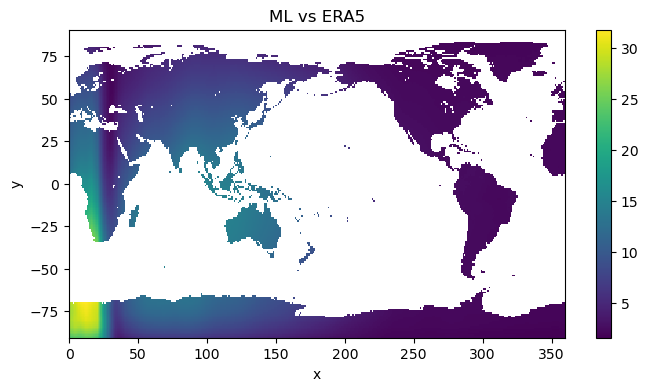

In [18]:
xs.rmse(
    ds['cesm_input'].where(ds['land_masks']==1,np.nan).isel(channel=3), 
    ds['era5_label'].where(ds['land_masks']==1,np.nan), dim='samples').plot.pcolormesh(
    'x','y',figsize=(8,4)); plt.title('CESM vs ERA5'); plt.show()
xs.rmse(
    ds['ml_predict'].where(ds['land_masks']==1,np.nan), 
    ds['era5_label'].where(ds['land_masks']==1,np.nan), dim='samples').plot.pcolormesh(
    'x','y',figsize=(8,4)); plt.title('ML vs ERA5'); plt.show()

In [19]:
print('CESM vs ERA5:',
    xs.rmse(
        ds['cesm_input'].where(ds['land_masks']==1,np.nan).isel(channel=3), 
        ds['era5_label'].where(ds['land_masks']==1,np.nan), 
        dim=['samples','x','y'], skipna=True).values
)
print('ML vs ERA5:',
    xs.rmse(
        ds['ml_predict'].where(ds['land_masks']==1,np.nan), 
        ds['era5_label'].where(ds['land_masks']==1,np.nan), 
        dim=['samples','x','y'], skipna=True).values
)

CESM vs ERA5: 0.1659725
ML vs ERA5: 8.598011
